# package_LAB

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from matplotlib import colors as mcolors

import package_DBR
from package_DBR import myRound, SelectPath_RT, Delay_RT, FO_RT, FOPDT, SOPDT, FOPDT_cost, SOPDT_cost, Process, Bode

import package_LAB
from package_LAB import LeadLag_RT, PID_RT

#Pour pouvoir modifier package_LAB et importer les modifications directement
from importlib import reload
package_DBR = reload(package_DBR)
package_LAB = reload(package_LAB)

# LeadLag_RT

In [3]:
help(LeadLag_RT)

Help on function LeadLag_RT in module package_LAB:

LeadLag_RT(MV, Kp, T_lead, T_lag, Ts, PV, PVInit=0, method='EBD')
    The function "LeadLag_RT" needs to be included in a "for or while loop".
    
    :MV: input vector
    :Kp: process gain
    :T: lag time constant [s]
    :Ts: sampling period [s]
    :PV: output vector
    :PVInit: (optional: default value is 0)
    :method: discretisation method (optional: default value is 'EBD')
        EBD: Euler Backward difference
        EFD: Euler Forward difference
        TRAP: Trapezoïdal method
    
    The function "LeadLag_RT" appends a value to the output vector "PV".
    The appended value is obtained from a recurrent equation that depends on the discretisation method.



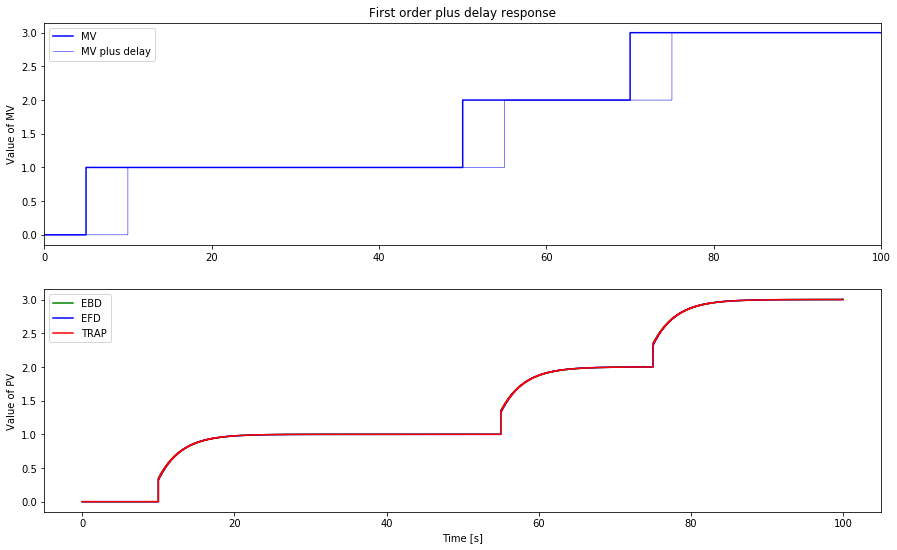

In [4]:
TSim = 100
Ts = 0.1
N = int(TSim/Ts) + 1

# Path for MV
MVPath = {0: 0, 5: 1, 50: 2, 70: 3, TSim: 3}

t = []
MV = []
MVDelay = []
PV_EBD = []
PV_EFD = []
PV_TRAP = []

# Parameters
Kp = 1
Tlead = 1
Tlag = 3
theta = 5

for i in range(0,N):
    t.append(i*Ts)
    SelectPath_RT(MVPath,t,MV)
    Delay_RT(MV,theta,Ts,MVDelay)
    LeadLag_RT(MVDelay,Kp,Tlead,Tlag,Ts,PV_EBD)
    LeadLag_RT(MVDelay,Kp,Tlead,Tlag,Ts,PV_EFD,0,'EFD')
    LeadLag_RT(MVDelay,Kp,Tlead,Tlag,Ts,PV_TRAP,0,'TRAP')
    
plt.figure(figsize = (15,9))

plt.subplot(2,1,1)
plt.step(t,MV,'b-',label='MV',where='post')
plt.step(t,MVDelay,'b-',linewidth=0.5,label='MV plus delay',where='post')
plt.ylabel('Value of MV')
plt.title('First order plus delay response')
plt.legend(loc='best')
plt.xlim([0, TSim])

plt.subplot(2,1,2)
plt.step(t,PV_EBD,'g-',label='EBD',where='post')
plt.step(t,PV_EFD,'b',label='EFD',where='post')
plt.step(t,PV_TRAP,'r',label='TRAP',where='post')
plt.ylabel('Value of PV')
plt.xlabel('Time [s]')
plt.legend(loc='best')


# PID_RT

In [5]:
help(PID_RT)

Help on function PID_RT in module package_LAB:

PID_RT(SP, PV, Man, MVMan, MVFF, Kc, Ti, Td, alpha, Ts, MVMin, MVMax, MV, MVP, MVI, MVD, E, ManFF=False, PVInit=0, method='EBD-EBD')
    The function "PID_RT" needs to be included in a "for or while loop". 
    
    :SP: SP (or SetPoint) vector 
    :PV: PV (or Process Value) vector 
    :Man: Man (or Manual controller mode) vector (True or False) 
    :MVMan: MVMan (or Manual value for MV) vector 
    :MVFF: MVFF (or Feedforward) vector 
    
    :Kc: controller gain 
    :Ti: integral time constant [s] 
    :Td: derivative time constant [s] 
    :alpha: Tfd = alpha*Td where Tfd is the derivative filter time constant [s] 
    :Ts: sampling period [s] 
    
    :MVMin: minimum value for MV (used for saturation and anti wind-up) 
    :MVMax: maximum value for MV (used for saturation and anti wind-up) 
    
    :MV: MV (or Manipulated Value) vector 
    :MVP: MVP (or Propotional part of MV) vector 
    :MVI: MVI (or Integral part of MV) vec

(0, 50)

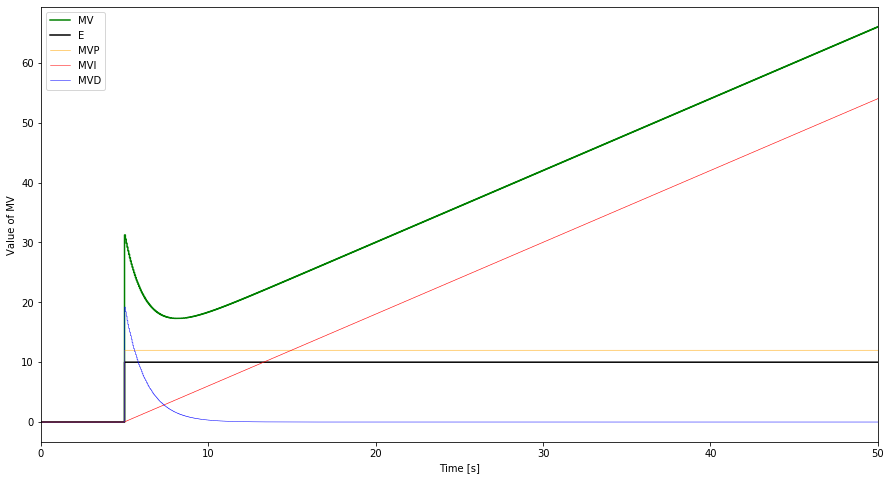

In [6]:
TSim = 100
Ts = 0.05
N = int(TSim/Ts) + 1

#Path for SP and PV
SPpath = {0: 0, 5: 10}
PVpath = {0: 0,85:5}
ManPath = {0: 0}
MVFFpath = {0: 0}

t = []
SP = []
PV = []
Man = []
MVMan = []
MVFF = []

Kc = 1.2
Ti = 10
Td = 2
alpha = 0.5

MVMin = 0
MVMax = 100

MV = []
MVP = []
MVI = []
MVD = []
E = []

ManFF = 0
PVInit = 0

for i in range(0,N):
    t.append(i*Ts)
    SelectPath_RT(SPpath,t,SP)
    SelectPath_RT(PVpath,t,PV)
    SelectPath_RT(ManPath,t,Man)
    SelectPath_RT(MVFFpath,t,MVFF)
    PID_RT(SP, PV, Man, MVMan, MVFF, Kc, Ti, Td, alpha, Ts, MVMin, MVMax, MV, MVP, MVI, MVD, E, ManFF=False, PVInit=0, method='EBD-EBD')
    
plt.figure(figsize = (15,8))
plt.title("Alpha : "+ str(alpha))
plt.step(t,MV,'g-',label='MV',where='post')
plt.step(t,E,'black',label='E',where='post')
plt.step(t,MVP,'orange',label='MVP',where='post',linewidth=0.5)
plt.step(t,MVI,'red',label='MVI',where='post',linewidth=0.5)
plt.step(t,MVD,'blue',label='MVD',where='post',linewidth=0.5)
plt.ylabel('Value of MV')
plt.xlabel('Time [s]')
plt.legend(loc='best')
plt.xlim([0, TSim])  

In [ ]:
!["Evolution based on alpha"](./PID_imgs/test_alpha.gif)